## Foreign currency exchange rate Prediction

<html>
<body>
<p>
Mahmudul Hasan Moon<br>
BSc(Eng.) in CSE, HSTU<br>
E-mail: mahmudulmoon123@gmail.com<br>
Website: staywithmoon.me</p>
</body>
</html>    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Bidirectional

In [2]:
data_set = pd.read_csv("Foreign_Exchange_Rates.csv", na_values = "ND")

In [3]:
data_set.head(20)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,1/3/2000,1.5172,0.9847,1.9033,0.6146,1.8050,1.4465,8.2798,7.7765,...,1.6563,7.3290,101.70,3.8,7.9640,8.4430,72.30,1.5808,31.38,36.97
1,1,1/4/2000,1.5239,0.9700,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.2180,103.09,3.8,7.9340,8.3600,72.65,1.5565,30.60,37.13
2,2,1/5/2000,1.5267,0.9676,1.9339,0.6092,1.8560,1.4518,8.2798,7.7780,...,1.6560,7.2080,103.77,3.8,7.9350,8.3530,72.95,1.5526,30.80,37.10
3,3,1/6/2000,1.5291,0.9686,1.9436,0.6070,1.8400,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.9400,8.3675,72.95,1.5540,31.75,37.62
4,4,1/7/2000,1.5272,0.9714,1.9380,0.6104,1.8310,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.9660,8.4150,73.15,1.5623,30.85,37.30
5,5,1/10/2000,1.5242,0.9754,1.9350,0.6107,1.8190,1.4568,8.2794,7.7785,...,1.6618,7.2540,105.28,3.8,8.0240,8.4490,73.30,1.5704,30.83,37.27
6,6,1/11/2000,1.5209,0.9688,1.9365,0.6068,1.8225,1.4570,8.2795,7.7785,...,1.6690,7.2140,106.09,3.8,7.9690,8.3970,73.35,1.5605,30.83,37.61
7,7,1/12/2000,1.5202,0.9727,1.9286,0.6073,1.8350,1.4550,8.2796,7.7787,...,1.6690,7.2360,105.76,3.8,7.9770,8.4180,73.35,1.5660,30.80,37.54
8,8,1/13/2000,1.4954,0.9737,1.9084,0.6067,1.8140,1.4495,8.2798,7.7788,...,1.6700,7.2520,106.09,3.8,7.9425,8.4170,73.35,1.5707,30.80,37.49
9,9,1/14/2000,1.5004,0.9874,1.9186,0.6115,1.8050,1.4497,8.2797,7.7789,...,1.6752,7.3470,105.86,3.8,7.9970,8.4740,73.35,1.5945,30.83,37.55


In [4]:
data_set.shape

(5216, 24)

In [5]:
data_set = data_set.dropna()

In [6]:
#Data frame
df = data_set['AUSTRALIA - AUSTRALIAN DOLLAR/US$']
df

0       1.5172
1       1.5239
2       1.5267
3       1.5291
4       1.5272
         ...  
5210    1.4445
5212    1.4411
5213    1.4331
5214    1.4278
5215    1.4225
Name: AUSTRALIA - AUSTRALIAN DOLLAR/US$, Length: 5014, dtype: float64

In [7]:
var = 'KOREA'

In [8]:
df = np.array(df).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = scaler.fit_transform(df)

In [9]:
#Training and test sets
train = df[:4800]
test = df[4800:]

print(train.shape)
print(test.shape)

(4800, 1)
(214, 1)


In [10]:
def get_data(data, look_back):
  data_x, data_y = [],[]
  for i in range(len(data)-look_back-1):
    data_x.append(data[i:(i+look_back),0])
    data_y.append(data[i+look_back,0])
  return np.array(data_x) , np.array(data_y)

look_back = 1

x_train , y_train = get_data(train, look_back)

print(x_train.shape)
print(y_train.shape)

(4798, 1)
(4798,)


In [11]:
x_test , y_test = get_data(test,look_back)

print(x_test.shape)
print(y_test.shape)

(212, 1)
(212,)


In [12]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### Ridge

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
model = Ridge(alpha=.01)
model.fit(x_train, y_train) 
y_pred= model.predict(x_test)

#Mean Squared Error
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
#mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.003946650580083585
Mean Squared Error: 2.3838628879494806e-05
Root Mean Squared Error: 0.004882481836063992
Mean_absolute_percentage_error:  0.8525887181527476


In [14]:
print('Variance score: %.2f' % model.score(x_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Variance score: 0.95
R2 score : 0.95


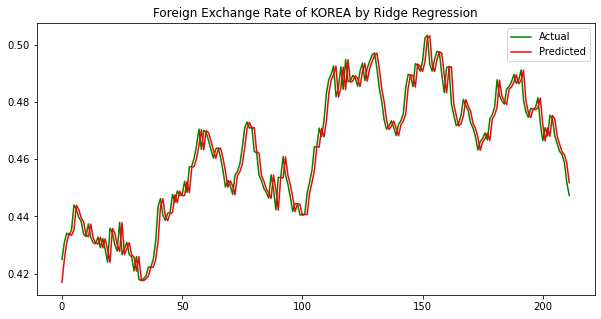

In [15]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of %s by Ridge Regression'%var)
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()
plt.savefig("%s + Ridge.png"%var)

### Lasso

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
y_pred= model_lasso.predict(x_test)

#Mean Squared Error
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
#mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.018520009215706165
Mean Squared Error: 0.00037688200622096134
Root Mean Squared Error: 0.01941344910676517
Mean_absolute_percentage_error:  3.967197784813776


In [17]:
print('Variance score: %.2f' % model.score(x_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Variance score: 0.95
R2 score : 0.22


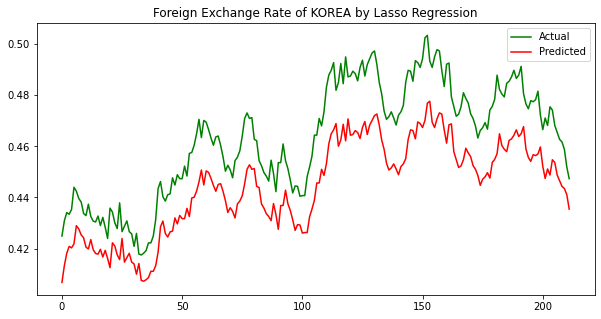

In [18]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of %s by Lasso Regression'%var)
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()
plt.savefig("%s + Lasso.png"%var)

### Decision Tree

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train) 
y_pred= regressor.predict(x_test)

#Mean Squared Error
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
#mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print('Mean_absolute_percentage_error: ', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.012750783732923692
Mean Squared Error: 0.00035332786427157614
Root Mean Squared Error: 0.01879701743020887
Mean_absolute_percentage_error:  2.7189257340313504


In [20]:
print('Variance score: %.2f' % model.score(x_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Variance score: 0.95
R2 score : 0.27


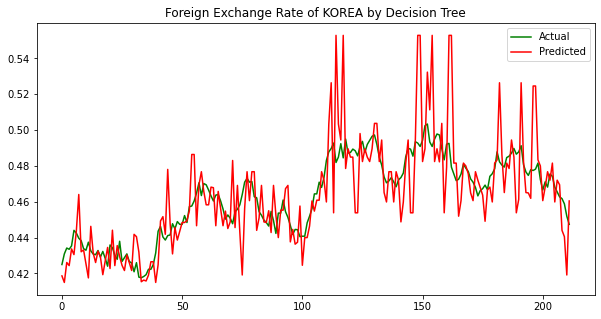

In [21]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of %s by Decision Tree'%var)
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()
plt.savefig("%s + Tree.png"%var)

## BiLSTM

In [22]:
#Processing train and test sets for LSTM model
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

print(x_train.shape)
print(x_test.shape)


(4798, 1, 1)
(212, 1, 1)


In [23]:
#Defining the LSTM model
n_features=x_train.shape[1]
model=Sequential()
model.add(Bidirectional(LSTM(100,activation='relu')))
model.add(Dense(n_features))

#Model summary
#model.summary()

In [24]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')

#Training
model.fit(x_train,y_train, epochs = 10, batch_size=1)

Epoch 1/10
4798/4798 [==============================] - 12s 2ms/step - loss: 0.0114
Epoch 2/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.3650e-04
Epoch 3/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.5463e-04
Epoch 4/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.3108e-04
Epoch 5/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.4702e-04
Epoch 6/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.4271e-04
Epoch 7/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.3292e-04
Epoch 8/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.3568e-04
Epoch 9/10
4798/4798 [==============================] - 10s 2ms/step - loss: 1.2385e-04
Epoch 10/10
4798/4798 [==============================] - 9s 2ms/step - loss: 1.2830e-04


In [25]:
#Prediction using the trained model
scaler.scale_

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

[[1.3902904]
 [1.3995475]
 [1.4064152]
 [1.4101975]
 [1.4094012]
 [1.4115908]
 [1.4216427]
 [1.4198514]
 [1.4165671]
 [1.4149747]]


In [26]:
#Processing test shape
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[1.4017]
 [1.4086]
 [1.4124]
 [1.4116]
 [1.4138]
 [1.4239]
 [1.4221]
 [1.4188]
 [1.4172]
 [1.412 ]]


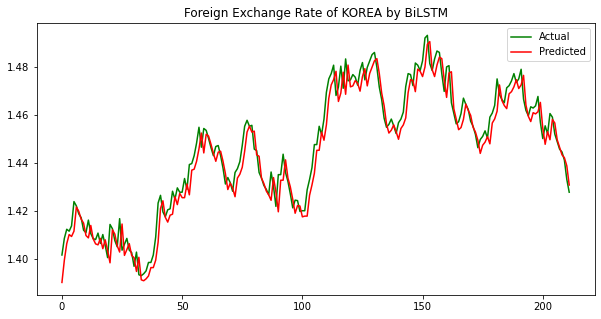

In [27]:
#Visualizing the results
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of %s by BiLSTM'%var)
plt.plot(y_test , label = 'Actual', color = 'g')
plt.plot(y_pred , label = 'Predicted', color = 'r')
plt.legend()
#plt.grid()
plt.savefig("%s + BiLSTM BR.png"%var)

In [28]:
#Mean Squared Error
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
#mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

import numpy as np

def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error: 0.004914192532593353
Mean Squared Error: 3.848058627019793e-05
Root Mean Squared Error: 0.006203272222802892
mean_absolute_percentage_error:  0.3394048118255754


In [30]:
#print('Variance score: %.2f' % model.score(x_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 0.94
